In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [35]:
audiocategory='breathing-deep,breathing-shallow,cough-heavy,cough-shallow,vowel-a,vowel-e,vowel-o,counting-normal,counting-fast'

In [36]:
results_folder = 'results'
classifier_name = 'RandomForest'
pred_path = os.path.join(results_folder, classifier_name, 'y_pred.npy')
true_path = os.path.join(results_folder, classifier_name, 'y_true.npy')
pred_proba_path = os.path.join(results_folder, classifier_name, 'y_pred_proba.npy')

y_pred = np.load(pred_path)
y_true = np.load(true_path)
y_proba = np.load(pred_proba_path)

In [37]:
y_pred.shape

(5777,)

confusion matrix:
 [[325 210  35  60   1   1   2  16  13]
 [315 215  46  57   0   1   1  25   5]
 [ 37  39 311 199   2   0   2  24  18]
 [ 44  39 241 262   1   1   2  33  11]
 [  6  11   8  11 370  78  28  36  54]
 [  7  12   7   6  56 570  24  26  24]
 [  2   3   3   3  12  11 530  22  24]
 [  9  12  23  30  12  15  22 388 132]
 [  8   7  11   5  28  18  22 192 305]]


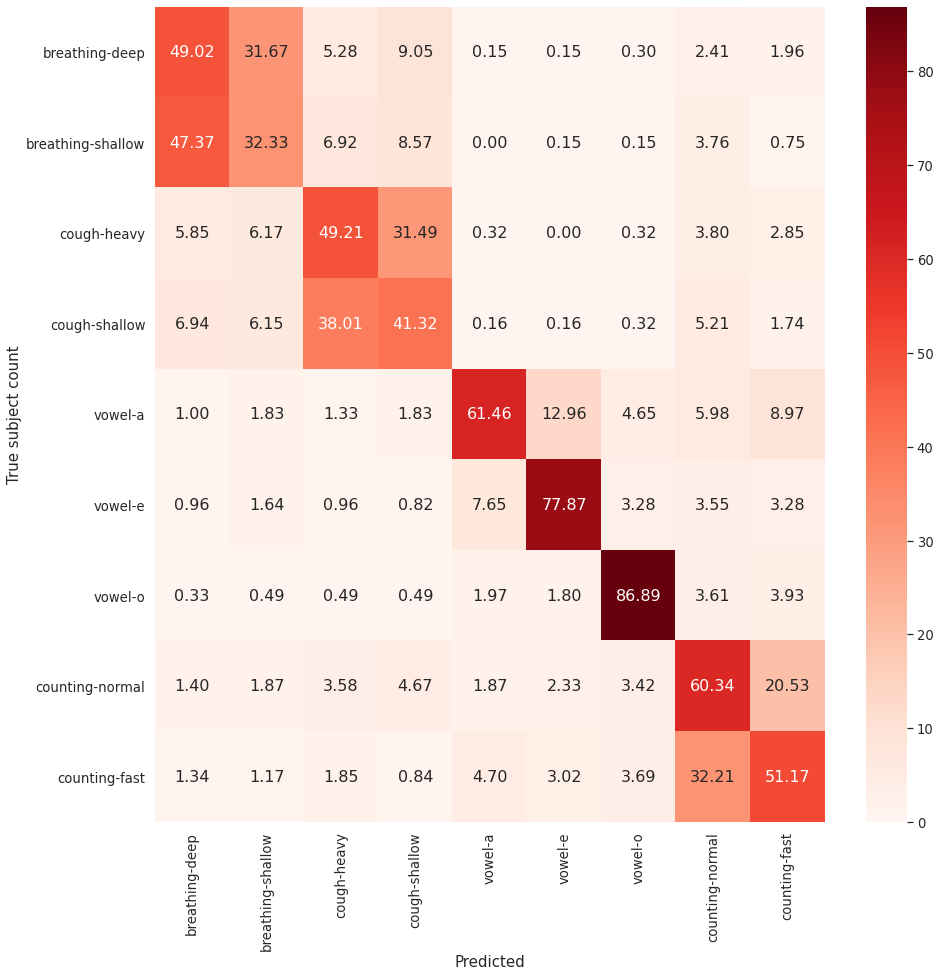

In [46]:
cm = confusion_matrix(y_true, y_pred)
print(f'confusion matrix:\n {cm}')

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmn = cmn*100
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=audiocategory.split(','), yticklabels=audiocategory.split(','), annot_kws={"size": 16}, cmap="Reds")
#sns.heatmap(cmn, annot=cm,fmt="d", xticklabels=audiocategory.split(','), yticklabels=audiocategory.split(','), annot_kws={"size": 15}, cmap="Reds")
plt.ylabel('True subject count', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.savefig(os.path.join(results_folder, classifier_name, 'confusion_matrix.jpg'))
plt.show()